# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#!pip install citipy

     |████████████████████████████████| 557 kB 233 kB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=4c999e65acd23e9fb9e9f6f4fafe6075c92ef80faac561d5055e327ed4757966
  Stored in directory: /Users/murillojessica/Library/Caches/pip/wheels/72/ae/63/5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress



# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Query URL
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
count_one = 0
set_one = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | newport
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | ampanihy
City not found. Skipping...
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | flinders
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | boende
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | magomeni
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | kapaa
City not found. Skipping...
Processing Record 15 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 16 of Set 1 | ossora
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | tuktoyaktuk
Processing

Processing Record 36 of Set 4 | sistranda
Processing Record 37 of Set 4 | waingapu
Processing Record 38 of Set 4 | sayyan
Processing Record 39 of Set 4 | sobolevo
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | turukhansk
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | bury saint edmunds
Processing Record 44 of Set 4 | ngunguru
Processing Record 45 of Set 4 | zhigansk
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | aksarka
Processing Record 49 of Set 4 | cherskiy
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | sivaki
City not found. Skipping...
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | kharp
Processing Record 6 of Set 5 | tromso
Processing Record 7 of Set 5 | dalby
Processing Record 8 of Set 5 | chokurdakh
Processing Record 9 of Set 5 | jagdalpur
Processing Record 10 of Set 5 | 

Processing Record 27 of Set 8 | traun
Processing Record 28 of Set 8 | storforshei
Processing Record 29 of Set 8 | peniche
Processing Record 30 of Set 8 | dustlik
Processing Record 31 of Set 8 | buraydah
Processing Record 32 of Set 8 | griffith
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | sitka
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | port blair
Processing Record 37 of Set 8 | kamalpur
Processing Record 38 of Set 8 | jiangyou
Processing Record 39 of Set 8 | haifa
Processing Record 40 of Set 8 | jiuquan
City not found. Skipping...
Processing Record 41 of Set 8 | camacha
City not found. Skipping...
Processing Record 42 of Set 8 | marawi
Processing Record 43 of Set 8 | santa cruz
City not found. Skipping...
Processing Record 44 of Set 8 | guadalajara
Processing Record 45 of Set 8 | maceio
Processing Record 46 of Set 8 | portland
Processing Record 47 of Set 8 | panguna
Processing Record 48 of Set 8 | bulaevo
Processing Record 49 

Processing Record 17 of Set 12 | crestview
Processing Record 18 of Set 12 | san carlos de bariloche
Processing Record 19 of Set 12 | vikhorevka
Processing Record 20 of Set 12 | maragogi
Processing Record 21 of Set 12 | japura
Processing Record 22 of Set 12 | chota
Processing Record 23 of Set 12 | okha
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
weather = { "City" : city_name,
           "Cloudiness": cloudiness,
           "Country": country,
           "Date": date,
           "Humidity": humidity,
           "Lat" : lat,
           "Lng":lng,
           "Wind Speed": wind_speed,
           "Max Temp":max_temp}

weather_df = pd.DataFrame(weather)

weather_df.to_csv('../output_data/weather_DF.csv',index = False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_100 = weather_df.loc[weather_df['Humidity']> 100, :]

humidity_100

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Wind Speed,Max Temp


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

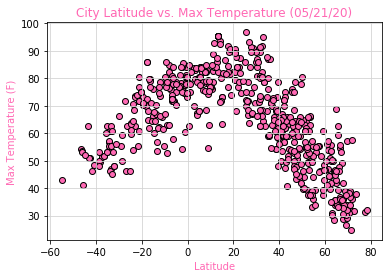

In [84]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="hotpink")
plt.title("City Latitude vs. Max Temperature (05/21/20)", color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Max Temperature (F)",color='hotpink')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/Lat_MaxTemp.png")

## Latitude vs. Humidity Plot

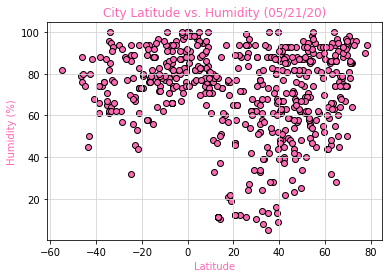

In [85]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="hotpink")
plt.title("City Latitude vs. Humidity (05/21/20)", color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Humidity (%)",color='hotpink')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/Lat_Humidity.png")


## Latitude vs. Cloudiness Plot

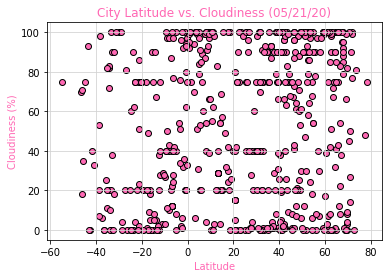

In [86]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="hotpink")
plt.title("City Latitude vs. Cloudiness (05/21/20)", color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Cloudiness (%)",color='hotpink')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/Lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

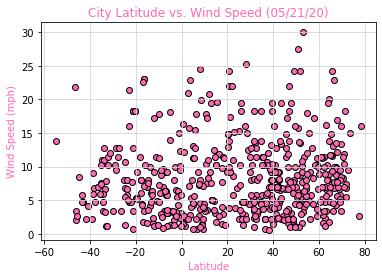

In [87]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="hotpink")
plt.title("City Latitude vs. Wind Speed (05/21/20)", color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Wind Speed (mph)",color='hotpink')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/Lat_WindSpeed.png")

## Linear Regression

In [48]:
# Define function for creating linear agression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, color="pink")
    plt.plot(x,regress_values,"r-")
    return line_eq

In [33]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Lat"]>0,:]
south_df = weather_df.loc[weather_df["Lat"]<0,:]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Wind Speed,Max Temp
1,hobart,0,AU,1590102786,80,-42.88,147.33,4.70,51.01
4,bluff,70,NZ,1590103042,79,-46.60,168.33,21.85,54.14
5,ampanihy,0,MG,1590103042,86,-24.70,44.75,6.82,63.64
6,ahipara,11,NZ,1590103042,65,-35.17,173.17,7.56,62.55
7,flinders,82,AU,1590103042,61,-34.58,150.86,11.01,57.00
...,...,...,...,...,...,...,...,...,...
551,ghanzi,0,BW,1590103084,44,-21.57,21.78,7.65,55.38
552,ngara,1,TZ,1590103085,100,-2.51,30.66,2.62,54.30
558,maragogi,11,BR,1590103086,84,-9.01,-35.22,9.55,78.82
559,japura,33,ID,1590103086,92,-0.32,102.35,1.10,74.68


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.82


Text(0, 0.5, 'Max Temp (f)')

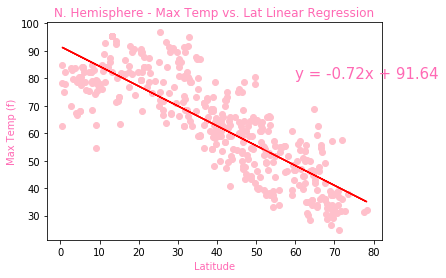

In [66]:
regression_1 = linear_regression(north_df['Lat'],north_df['Max Temp'])
plt.annotate(regression_1,(60,80),fontsize=15,color="hotpink")
plt.title('N. Hemisphere - Max Temp vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Max Temp (f)",color='hotpink')


plt.savefig("../Images/SHemisphere_Max Temp_Lat.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76


Text(0, 0.5, 'Max Temp (f)')

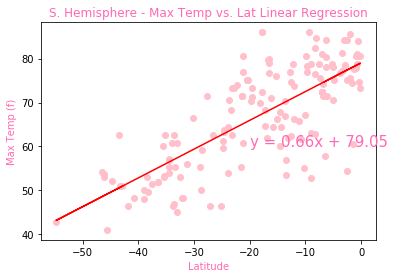

In [72]:
regression_2 = linear_regression(south_df['Lat'],south_df['Max Temp'])
plt.annotate(regression_2,(-20,60),fontsize=15,color="hotpink")
plt.title('S. Hemisphere - Max Temp vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Max Temp (f)",color='hotpink')


plt.savefig("../Images/NHemisphere_Max Temp_Lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


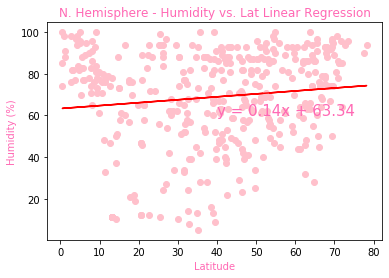

In [75]:
regression_3 = linear_regression(north_df['Lat'],north_df['Humidity'])
plt.annotate(regression_3,(40,60),fontsize=15,color="hotpink")
plt.title('N. Hemisphere - Humidity vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Humidity (%)",color='hotpink')


plt.savefig("../Images/NHemisphere_Humidity_Lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.25


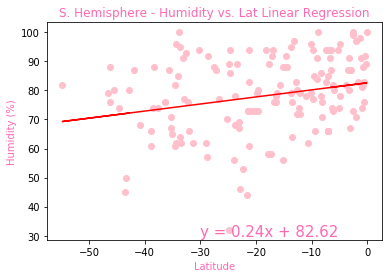

In [76]:
regression_4 = linear_regression(south_df['Lat'],south_df['Humidity'])
plt.annotate(regression_4,(-30,30),fontsize=15,color="hotpink")
plt.title('S. Hemisphere - Humidity vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Humidity (%)",color='hotpink')


plt.savefig("../Images/SHemisphere_Humidity_Lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.01


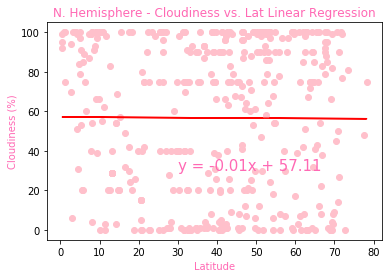

In [78]:
regression_5 = linear_regression(north_df['Lat'],north_df['Cloudiness'])
plt.annotate(regression_5,(30,30),fontsize=15,color="hotpink")
plt.title('N. Hemisphere - Cloudiness vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Cloudiness (%)",color='hotpink')


plt.savefig("../Images/NHemisphere_Cloudiness_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03


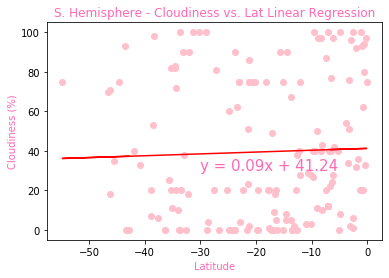

In [79]:
regression_6 = linear_regression(south_df['Lat'],south_df['Cloudiness'])
plt.annotate(regression_6,(-30,30),fontsize=15,color="hotpink")
plt.title('S. Hemisphere - Cloudiness vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Cloudiness (%)",color='hotpink')


plt.savefig("../Images/SHemisphere_Cloudiness_Lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04


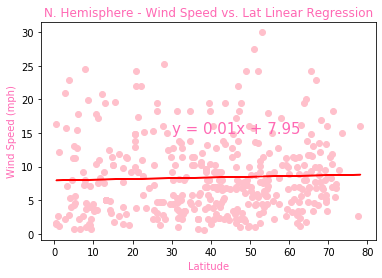

In [82]:
regression_7 = linear_regression(north_df['Lat'],north_df['Wind Speed'])
plt.annotate(regression_7,(30,15),fontsize=15,color="hotpink")
plt.title('N. Hemisphere - Wind Speed vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Wind Speed (mph)",color='hotpink')


plt.savefig("../Images/NHemisphere_WindSpeeds_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.11


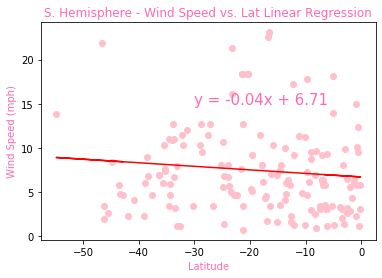

In [83]:
regression_8 = linear_regression(south_df['Lat'],south_df['Wind Speed'])
plt.annotate(regression_8,(-30,15),fontsize=15,color="hotpink")
plt.title('S. Hemisphere - Wind Speed vs. Lat Linear Regression', color='hotpink')
plt.xlabel("Latitude",color='hotpink')
plt.ylabel("Wind Speed (mph)",color='hotpink')


plt.savefig("../Images/SHemisphere_WindSpeeds_Lat.png")